## 1. Importing important library

In [1]:
import pandas as pd
import numpy as np

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Exploring Dataset

In [56]:
data = pd.read_csv("MGC.csv")
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


### I. Attributes of Datasets

In [57]:
print(list(data.columns))

['instance_id', 'artist_name', 'track_name', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre']


### II. Target Variable or Music genres

In [58]:
print(data.music_genre.value_counts().index)

Index(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues',
       'Rock', 'Classical', 'Hip-Hop'],
      dtype='object')


In [59]:
data.music_genre.value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

### III. Distribution -  uniformly distributed dataset

<BarContainer object of 10 artists>

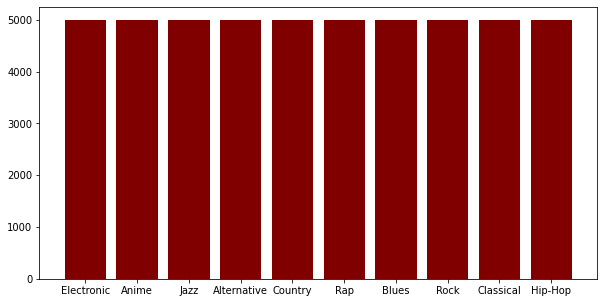

In [60]:
label = data.music_genre.value_counts().index
values =  data.music_genre.value_counts().values
list(label)
list(values)
plt.figure(figsize = (10 , 5))
plt.bar(label , values , color = "maroon")

## Insight: Data is uniformly distributed

### IV. Types of Attributes

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

## Insights : seven attributes is object type and 10 attributes are of float type

### Let's see if our data has missing values

In [64]:
data.isnull().any()

instance_id         True
artist_name         True
track_name          True
popularity          True
acousticness        True
danceability        True
duration_ms         True
energy              True
instrumentalness    True
key                 True
liveness            True
loudness            True
mode                True
speechiness         True
tempo               True
obtained_date       True
valence             True
music_genre         True
dtype: bool

In [66]:
# Number or data that null ??
data.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [11]:
data.dropna(how='any', inplace=True)

In [12]:
dataset_null=(data.isna().sum()/len(data))*100.0
dataset_null_ratio=dataset_null.drop(dataset_null[dataset_null==0].index).sort_values(ascending=False)
print(dataset_null_ratio)

Series([], dtype: float64)


##  Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
col = [var for var in data.columns if data[var].dtypes=='O']
encoder = LabelEncoder()
for to_en in col:
    data[to_en] =  encoder.fit_transform(data[to_en])

In [14]:
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,5029,28371,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,274,3,0.759,5
1,46652.0,6117,34817,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,4193,3,0.531,5
2,30097.0,1591,15024,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,8138,3,0.333,5
3,62177.0,1707,23372,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,8158,3,0.270,5
4,24907.0,6519,8649,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,13021,3,0.323,5


In [15]:
data.shape

(50000, 18)

In [16]:
# Splitting the dataset
data.dropna(how='any', inplace=True)
from sklearn.model_selection import train_test_split
X = data.drop(columns=['music_genre'])
y = data['music_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify = y, random_state = 7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000, 17), (15000, 17), (35000,), (15000,))

## 3. Constructing DecisionTree Model with gini and other default parameters

In [17]:
from sklearn.tree import DecisionTreeClassifier ,  export_graphviz
from sklearn import tree
tree_clf = DecisionTreeClassifier(criterion='gini')
tree_clf.fit(X_train , y_train)


DecisionTreeClassifier()

## 4. Evaluating our model of DecisionTree

In [31]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix

y_pred_train = tree_clf.predict(X_train) 

#print train f1_score and test f1_score
train_f1_score = f1_score(y_train , y_pred_train ,  average='weighted')
print("Train f1-score = ",train_f1_score)
y_pred = tree_clf.predict(X_test) 


print("Test f1_score= " , test_f1_score)
test_f1_score = f1_score(y_test , y_pred , average='weighted')


#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Train f1-score =  1.0
Test f1_score=  0.4511011486151828
Accuracy: 0.45153333333333334
[[ 402   35  108   24  206  125  125  109  112  254]
 [  46 1026  130  104   42   94    8   41    1    8]
 [  90  127  650   58  141  154    5  211    9   55]
 [  33  111   65 1138   18   32    1   95    1    6]
 [ 173   26  147   14  662   60   51  114   45  208]
 [ 102  101  143   37   62  748   28  211   23   45]
 [ 118    3   13    1   44   34  495   41  676   75]
 [  96   55  211  110  107  252   32  556   21   60]
 [ 110    0   16    0   41   29  657   30  486  131]
 [ 257   14   59    6  210   40   88   68  148  610]]


## Insight : since we see that train f1_score is 1.0 which shows our model has been overfitted. we need to find the best depth for the tree

## 5. Testing for best depth

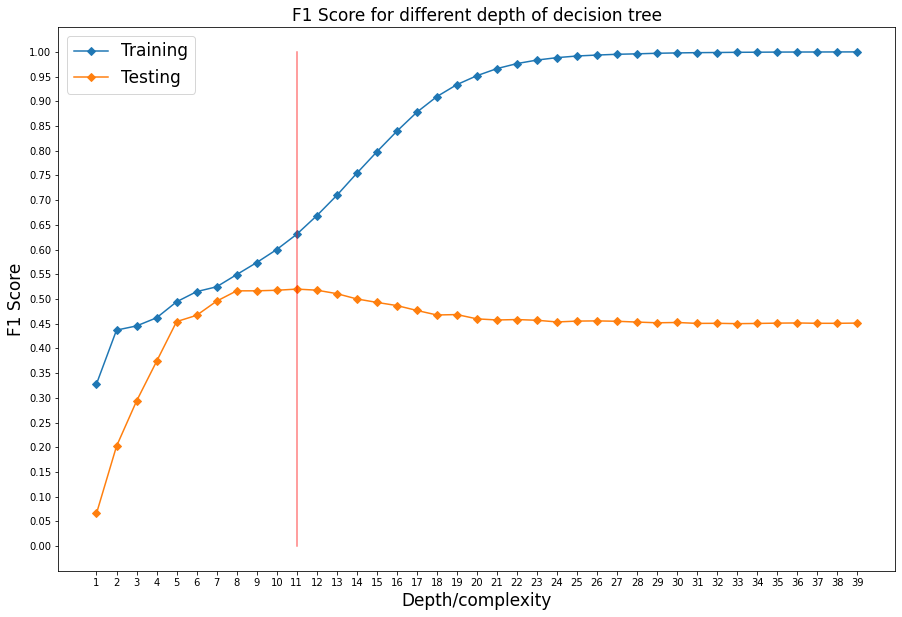

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


train_scores = []
test_scores = []
for i in range(1, tree_clf.get_depth()+1):
    model = DecisionTreeClassifier(random_state=7, max_depth=i).fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_scores.append(f1_score(y_pred_train, y_train, average='weighted'))
    y_pred = model.predict(X_test) # Making Predictions
    test_scores.append(f1_score(y_test, y_pred, average='weighted'))

max_test_score = np.argmax(test_socres) + 1
depth = tree_clf.get_depth()
plt.figure(figsize = (15,10))  
plt.plot(np.arange(1, depth+1, 1), train_scores, marker = 'D', label = 'Training')
plt.plot(np.arange(1, depth+1, 1), test_socres, marker = 'D', label = "Testing")
plt.plot([max_test_score,max_test_score], [0.0, 1.00], '', color = 'red', alpha = 0.5)
plt.xlabel("Depth/complexity", fontsize = 17)
plt.ylabel("F1 Score", fontsize = 17)
plt.title("F1 Score for different depth of decision tree", fontsize = 17)
plt.xticks(np.arange(1, depth+1, 1)) 
plt.yticks(np.arange(0.0, 1.05, 0.05))
plt.legend(fontsize = 17)
plt.show()

## Insight: We see that after the depth of 11 the testing f1_score is falling down so optimal depth of our tree would  be that. 

## 6. Evaluating model for the max_depth =12

In [35]:
from sklearn.tree import DecisionTreeClassifier ,  export_graphviz

from sklearn import tree
model = DecisionTreeClassifier(max_depth=12)

model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=12)

In [38]:

from sklearn.metrics import f1_score

y_pred_train = model.predict(X_train) 
train_f1_score = f1_score(y_train , y_pred_train ,  average='weighted') 
y_pred = tree_clf.predict(X_train) 
test_f1_score = f1_score(y_train , y_pred , average='weighted') 

print("Train f1-score = {} and Test f1-score = {}".format(round(train_f1_score, 2), round(test_f1_score, 2)))
print("The depth of our tree is {}".format(model.get_depth()))

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Train f1-score = 0.67 and Test f1-score = 1.0
The depth of our tree is 12
Accuracy: 0.5168


## Insight: we can see that the accuracy has increased  to 51.6% and f1_score became average in train set so, we have got better model from before

## 7. Using Random forest algorithm

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# train the classifier on the training data
rfc.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc.predict(X_test)

# calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5590666666666667


## Insights: Accuracy increased by little but not as expected

## 8. Ateempting Post-pruning in Decision tree to see if accuracy increases

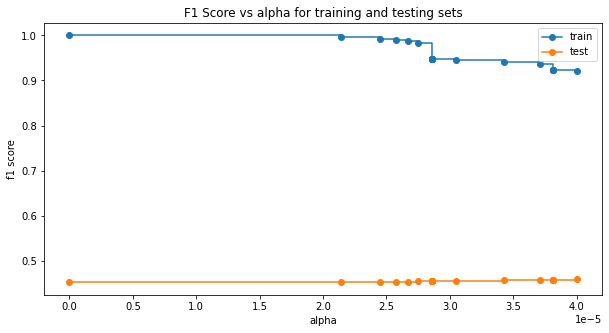

In [45]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = sorted(ccp_alphas)
candidate_alphas = [ccp_alphas[i] for i in range(0, 2416, 100)]
candidate_alphas = candidate_alphas[:-2]

clfs = []
for ccp_alpha in candidate_alphas:
    clf = DecisionTreeClassifier(random_state=7, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
    
train_scores = [f1_score(clf.predict(X_train), y_train, average='weighted') for clf in clfs]
test_scores = [f1_score(clf.predict(X_test), y_test, average='weighted') for clf in clfs]

plt.figure(figsize = (10,5))
plt.xlabel("alpha")
plt.ylabel("f1 score")
plt.title("F1 Score vs alpha for training and testing sets")
plt.plot(candidate_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
plt.plot(candidate_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
plt.legend()
plt.show()

In [55]:
index = np.argmax(test_scores)
best_alpha = candidate_alphas[index]
clf = DecisionTreeClassifier(random_state =  7 , ccp_alpha = best_alpha)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_result = f1_score(clf.predict(X_train), y_train, average='weighted')


acc = accuracy_score(y_test,y_pred)
print("accuracy: " ,acc)
print("f1_score: ", test_result)

accuracy:  0.45893333333333336
f1_score:  0.9208595593029024


## Insights: No significant change in accuracy has been found

## works are Remaining